# Régréssion logistique

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Important la data avec pandas

In [2]:
df=pd.read_csv("titanic-passengers.csv",";")

In [3]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
X=df.iloc[:,[2,4,5]].values
y=df.iloc[:,1].values

# Gestion des valeurs manquantes

In [9]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan , strategy="mean")
imp.fit(X[:,2:])
X[:,2:]=imp.fit_transform((X[:,2:]))

# Gestion des variables catégoriques

In [16]:
print("Matrice X: ",X,"\n", "Vecteur y: ",y)

Matrice X:  [[2 'male' 28.0]
 [3 'male' 25.0]
 [3 'male' 20.0]
 ...
 [3 'female' 30.0]
 [3 'male' 29.69911764705882]
 [2 'female' 19.0]] 
 Vecteur y:  ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No'
 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes'
 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'

In [22]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
lab_X=LabelEncoder()
X[:,1]=lab_X.fit_transform(X[:,1])
lab_y=LabelEncoder()
y=lab_y.fit_transform(y)
y=y.astype('int')

In [23]:
print("Matrice X: ",X,"\n", "Vecteur y: ",y)

Matrice X:  [[2 1 28.0]
 [3 1 25.0]
 [3 1 20.0]
 ...
 [3 0 30.0]
 [3 1 29.69911764705882]
 [2 0 19.0]] 
 Vecteur y:  [0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0
 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1
 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1
 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1
 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0
 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0
 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0

In [24]:
col=ColumnTransformer([("encouder",OneHotEncoder(),[0])],remainder="passthrough")
X=np.array(col.fit_transform(X),dtype=np.float64)

In [26]:
print("Matrice X: \n",X)

Matrice X: 
 [[ 0.          1.          0.          1.         28.        ]
 [ 0.          0.          1.          1.         25.        ]
 [ 0.          0.          1.          1.         20.        ]
 ...
 [ 0.          0.          1.          0.         30.        ]
 [ 0.          0.          1.          1.         29.69911765]
 [ 0.          1.          0.          0.         19.        ]]


In [74]:
X=X[:,1:]

# Diviser le dataset entre le Training set et le Test set

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2, random_state=15)

# Construction du modèle

In [76]:
from sklearn.linear_model import LogisticRegression
linlog=LogisticRegression()
linlog.fit(X_train,y_train)

LogisticRegression()

# Faire de nouvelles prédictions

In [77]:
y_pred=linlog.predict(X_test)
y_pred_proba=linlog.predict_proba(X_test)

In [78]:
y_pred_proba

array([[0.48375717, 0.51624283],
       [0.11260467, 0.88739533],
       [0.94763573, 0.05236427],
       [0.07969545, 0.92030455],
       [0.65418568, 0.34581432],
       [0.87995195, 0.12004805],
       [0.91059117, 0.08940883],
       [0.50223041, 0.49776959],
       [0.23684562, 0.76315438],
       [0.48375717, 0.51624283],
       [0.90716819, 0.09283181],
       [0.14868871, 0.85131129],
       [0.88210487, 0.11789513],
       [0.91609383, 0.08390617],
       [0.08618515, 0.91381485],
       [0.47453222, 0.52546778],
       [0.87995195, 0.12004805],
       [0.87099828, 0.12900172],
       [0.72986522, 0.27013478],
       [0.1649731 , 0.8350269 ],
       [0.87554417, 0.12445583],
       [0.1649731 , 0.8350269 ],
       [0.17660498, 0.82339502],
       [0.93138633, 0.06861367],
       [0.24439818, 0.75560182],
       [0.92871407, 0.07128593],
       [0.90001377, 0.09998623],
       [0.50223041, 0.49776959],
       [0.88836382, 0.11163618],
       [0.07993055, 0.92006945],
       [0.

In [79]:
y_pred_proba=y_pred_proba[:,1]
y_pred_proba

array([0.51624283, 0.88739533, 0.05236427, 0.92030455, 0.34581432,
       0.12004805, 0.08940883, 0.49776959, 0.76315438, 0.51624283,
       0.09283181, 0.85131129, 0.11789513, 0.08390617, 0.91381485,
       0.52546778, 0.12004805, 0.12900172, 0.27013478, 0.8350269 ,
       0.12445583, 0.8350269 , 0.82339502, 0.06861367, 0.75560182,
       0.07128593, 0.09998623, 0.49776959, 0.11163618, 0.92006945,
       0.08390617, 0.11577574, 0.06861367, 0.07692064, 0.29254452,
       0.76500568, 0.29254452, 0.08390617, 0.8350269 , 0.22226308,
       0.12445583, 0.93336299, 0.3098337 , 0.22944528, 0.51624283,
       0.8350269 , 0.10184987, 0.74016193, 0.3098337 , 0.97299574,
       0.78310923, 0.76883015, 0.16360229, 0.07128593, 0.05444066,
       0.33474201, 0.53569911, 0.95111563, 0.23674272, 0.13851807,
       0.11905704, 0.09634971, 0.1765222 , 0.73218365, 0.52341144,
       0.08390617, 0.77045404, 0.074054  , 0.51624283, 0.10374425,
       0.07692064, 0.20150124, 0.54590048, 0.074054  , 0.77763

# Matrice de confusion

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

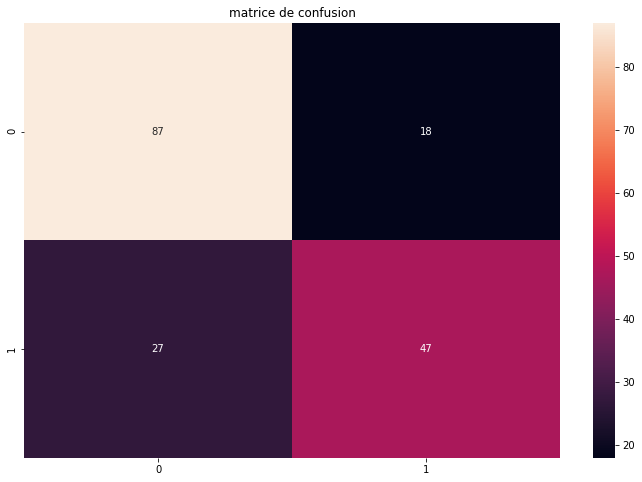

In [81]:
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True,fmt=".0f")
plt.title("matrice de confusion")
plt.show()

In [82]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score
print(" accuracy_score=",accuracy_score(y_test,y_pred),"\n precision_score=",precision_score(y_test,y_pred),"\n f1_score=",f1_score(y_test,y_pred),"\n recall_score=",recall_score(y_test,y_pred))

 accuracy_score= 0.7486033519553073 
 precision_score= 0.7230769230769231 
 f1_score= 0.6762589928057553 
 recall_score= 0.6351351351351351


# Roc_Auc

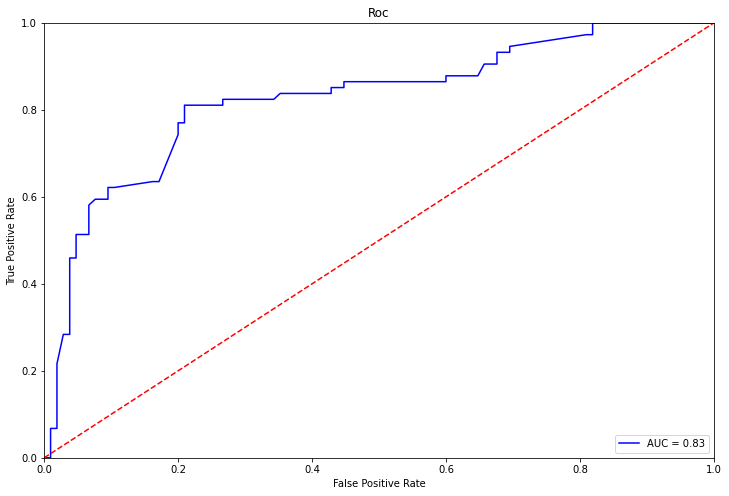

In [83]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test,y_pred_proba)
roc_auc =auc(fpr, tpr)
plt.figure(figsize=(12,8))
plt.title('Roc')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#  Faire de nouvelles prédictions

In [89]:
linlog.predict_proba([[0,0,1,38]])

array([[0.56856776, 0.43143224]])

In [92]:
df['Survived'].value_counts()

No     549
Yes    342
Name: Survived, dtype: int64